In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load sonar dataset from OpenML
sonar = fetch_openml(name='sonar', version=1, as_frame=True)

# Combine features and target
df = sonar.frame

# Save as CSV
df.to_csv('sonar.csv', index=False, header=False)

print("sonar.csv created successfully!")



sonar.csv created successfully!


In [5]:
import os
os.listdir('/content')



['.config', 'sonar.csv', 'sample_data']

In [42]:
sonar_data = pd.read_csv('/content/sonar.csv', header=None)

print("Dataset Shape:", sonar_data.shape)
sonar_data.head()


Dataset Shape: (208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


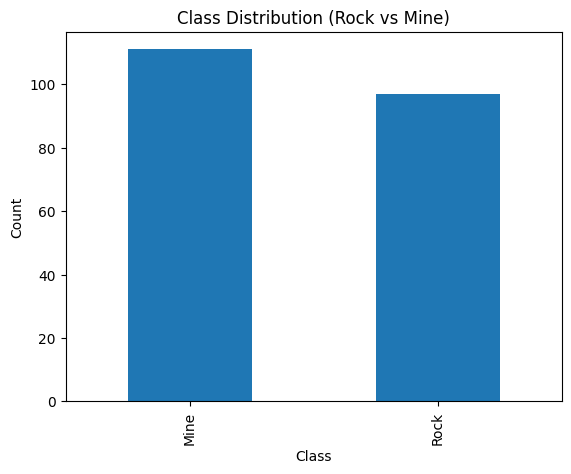

In [44]:
sonar_data[60].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Rock vs Mine)")
plt.show()

In [59]:
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

print("Features shape:", X.shape)
print("Labels shape:", Y.shape)

Features shape: (208, 60)
Labels shape: (208,)


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y,
    random_state=2
)

In [47]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [48]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)

# Testing accuracy
X_test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.8072289156626506
Testing Accuracy: 0.8095238095238095


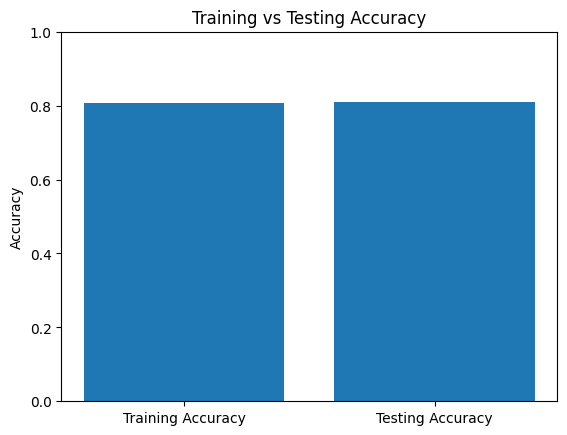

In [49]:
plt.bar(['Training Accuracy', 'Testing Accuracy'],
        [training_accuracy, testing_accuracy])
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.ylim(0, 1)
plt.show()

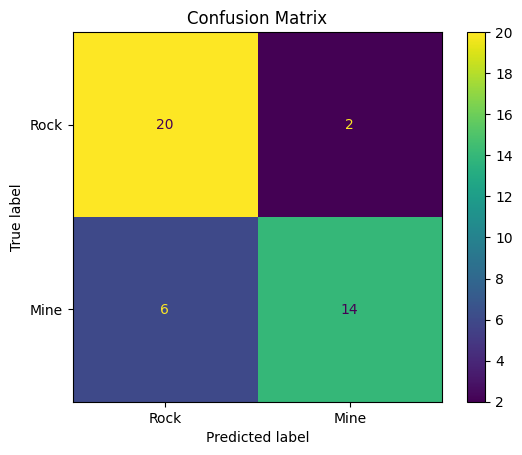

In [50]:
cm = confusion_matrix(Y_test, X_test_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Rock', 'Mine'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

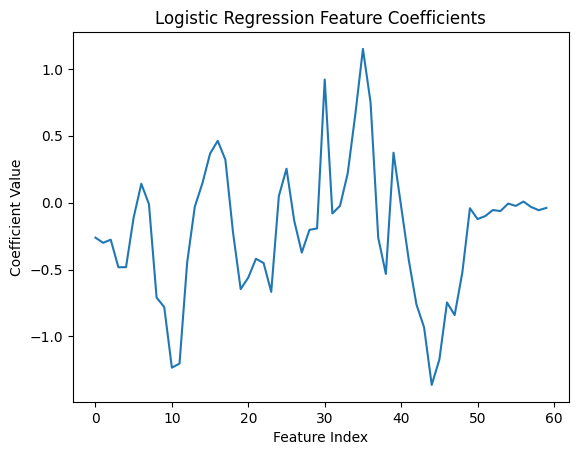

In [51]:
coefficients = model.coef_[0]

plt.plot(coefficients)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression Feature Coefficients")
plt.show()

In [63]:
input_data = (
    0.0200, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601,
    0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.0660, 0.2273,
    0.3100, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.5550,
    0.6711, 0.6415, 0.7104, 0.8080, 0.6791, 0.3857, 0.1307, 0.2604,
    0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
    0.0510, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343,
    0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167,
    0.0180, 0.0084, 0.0091, 0.0046
)

import numpy as np

input_data_np = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_data_np)

if prediction[0] == 'R':
    print("Prediction: The object is a ROCK")
else:
    print("Prediction: The object is a MINE")



Prediction: The object is a MINE


In [65]:
#Check Model Accuracy (MOST BASIC CHECK)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)


Training Accuracy: 0.8072289156626506
Testing Accuracy: 0.8095238095238095


In [66]:
#Check Confusion Matrix (VERY IMPORTANT)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, X_test_prediction)
print(cm)


[[20  2]
 [ 6 14]]


In [72]:
#Test Model on Known Data (BEST PRACTICE)
sample_index = 5

print("Actual Label:", Y_test.iloc[sample_index])

sample_input = X_test.iloc[sample_index].values.reshape(1, -1)
predicted_label = model.predict(sample_input)

print("Predicted Label:", predicted_label[0])


Actual Label: Mine
Predicted Label: Mine


In [68]:
#Predict Multiple Samples (STRONG CHECK)
predictions = model.predict(X_test[:10])

for i in range(10):
    print(f"Actual: {Y_test.iloc[i]} | Predicted: {predictions[i]}")


Actual: Mine | Predicted: Mine
Actual: Mine | Predicted: Mine
Actual: Rock | Predicted: Rock
Actual: Rock | Predicted: Mine
Actual: Mine | Predicted: Mine
Actual: Mine | Predicted: Mine
Actual: Rock | Predicted: Mine
Actual: Mine | Predicted: Mine
Actual: Mine | Predicted: Mine
Actual: Rock | Predicted: Rock


In [71]:
#Check Probability Output (ADVANCED)
probabilities = model.predict_proba(X_test[:1])
print("Probability [Rock, Mine]:", probabilities)


Probability [Rock, Mine]: [[0.55406146 0.44593854]]
